<img src="http://upxacademy.com/wp-content/uploads/2016/07/upx-logo-02-e1467712070244.png">
# UpX Academy - Python Advanced Practice
# Solution - Ex 09 - Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Read appl_1980_2014.csv file and assign it to a variable apple

In [3]:
apple = pd.read_csv("D:/UpX/DS-FoundationJan17/Week3/Assignments/Problems/PythonAdvanced/Datasets/appl_1980_2014.csv")
apple['High'] = apple['High'].astype(int)
print (apple['High'].dtype)
apple.head()

int32


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94,93.13,93.52,38170200,93.52


### Step 3.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High           int32
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 4. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 5.  Set the date as the index

In [6]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96,93.92,95.35,65130000,95.35
2014-07-07,94.14,95,94.10,95.97,56305400,95.97
2014-07-03,93.67,94,93.20,94.03,22891800,94.03
2014-07-02,93.87,94,93.09,93.48,28420900,93.48
2014-07-01,93.52,94,93.13,93.52,38170200,93.52


### Step 6.  Is there any duplicate dates?

In [7]:
# NO! All are unique
apple.index.is_unique

True

### Step 7.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28,28.75,28.75,117258400,0.45
1980-12-15,27.38,27,27.25,27.25,43971200,0.42
1980-12-16,25.37,25,25.25,25.25,26432000,0.39
1980-12-17,25.87,26,25.87,25.87,21610400,0.40
1980-12-18,26.63,26,26.63,26.63,18362400,0.41


### Step 8. Get the last business day of each month

In [9]:
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.153846,30.443077,30.443077,25862523,0.473077
1981-01-30,31.754762,31.476190,31.654762,31.654762,7249866,0.493810
1981-02-27,26.480000,26.000000,26.407895,26.407895,4231831,0.411053
1981-03-31,24.937727,24.545455,24.836364,24.836364,7962690,0.387727
1981-04-30,27.286667,26.952381,27.227143,27.227143,6392000,0.423333


### Step 9.  What is the difference in days between the first day and the oldest

In [10]:
(apple.index.max() - apple.index.min()).days

12261

### Step 10.  How many months in the data we have?

In [11]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Step 11. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

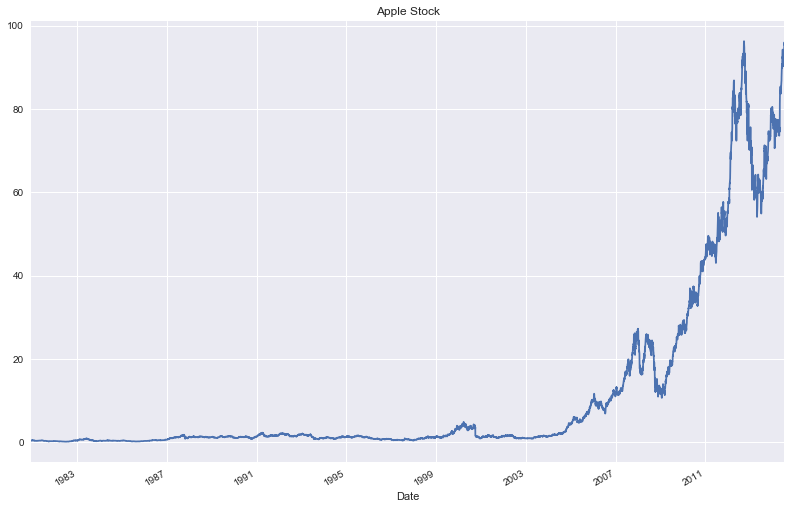

In [12]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)